In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy import stats
from scipy.stats import iqr
from scipy.stats import norm

belize_df = pd.read_csv("belize_airbnb_listings.csv")
belize_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36666,Mo's Cozy Casa w/ veranda & access to dock,157752,Monique,Belize,Belize Islands,17.74786,-88.02398,Entire home/apt,141,3,250,2/23/2021,2.00,5,225
1,36690,Mo's Cozy Cabana w/ comfy veranda & access to ...,157752,Monique,Belize,Belize Islands,17.74832,-88.02474,Entire home/apt,71,3,316,2/19/2021,2.46,5,164
2,108932,Purple House eco solar w/ ocean & wildlife views,563377,Michael,Belize,Belize Islands,17.73221,-88.03824,Entire home/apt,191,2,30,3/14/2020,0.78,1,364
3,110483,Michelo's fuchsia suite,567809,Michel,Stann Creek,Stann Creek Mainland,16.52114,-88.36926,Hotel room,121,1,27,2/24/2020,0.29,3,331
4,120115,Seaside Villas Second Floor Unit #4,604999,Bobbi,Belize,Belize Islands,17.74166,-88.02395,Entire home/apt,343,1,30,3/18/2020,0.64,22,203


## 1.	Why is assuming normal data an important consideration when answering questions about probability?

Normal data /distribution guarantees that the p-values are accurate within a given sample size producing fewer outliers on the high and low ends of the data range. Normal data ensures the overall validity / credability of the results. 

## 2. Create two histograms in a subplot (vertical or horizontal is fine) that show the distribution of reviews_per_month and number_of_reviews in Belize Airbnb data 
a.	How do you choose your bin size?


One method is to use grouped frequency distribution taking the smallest and largest data points and the Sturges formula which determines the approximate number of classes to form a distribution table and determine the width of bins. 

Sturges formula
K=1+3.322logN 
K= Number of classes
logN = Logarithm of the total number of observations


Read more: https://www.emathzone.com/tutorials/basic-statistics/construction-of-frequency-distribution.html#ixzz7CXv1Ss25. 

In [2]:
#checking # of data points and distribution for bin determination
belize_df['reviews_per_month'].describe()
belize_df['number_of_reviews'].describe()
belize_df['number_of_reviews'].value_counts().nlargest(40)
#K = (1 + 3.322 *log(2796)) =12.5 K = (1 + 3.322 *log(1810))=11.8

0     986
1     258
2     162
3     146
4      92
5      84
6      64
8      58
7      54
9      50
10     50
12     39
11     39
16     26
14     25
22     25
17     23
18     23
20     21
15     20
13     20
19     19
25     16
33     16
23     16
27     14
37     14
24     14
21     14
30     13
26     12
48     11
32     11
40     10
36     10
41      9
53      9
28      9
34      9
31      9
Name: number_of_reviews, dtype: int64

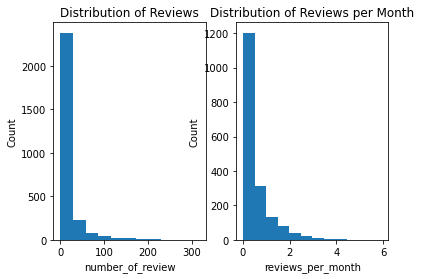

In [3]:
#create multiple plots together
plt.subplot(1, 2, 1)
plt.hist(belize_df['number_of_reviews'], bins = 11)
plt.ylabel('Count')
plt.xlabel('number_of_review')
plt.title('Distribution of Reviews')
plt.subplot(1, 2, 2)
plt.hist(belize_df['reviews_per_month'], bins = 12)
plt.ylabel('Count')
plt.xlabel('reviews_per_month')
plt.title('Distribution of Reviews per Month')
plt.show()

## 3. Create a box and whisker plot for availability_365. 
What does this show you? 

This boxplot shows that Air BnBs have availability most of the year, ~225 (1Q) - 365(3Q-4Q) days with the median (3Q) around 350 days of availability. There are a few outliers or error data point near the minimum value or limited to no availability range.  

Text(0.5, 1.0, 'Belize Air BnB Availability')

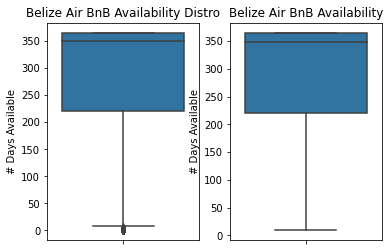

In [4]:
#boxplots 
plt.subplot(1,2,1)
sns.boxplot(y='availability_365', data=belize_df)
plt.ylabel('# Days Available')
plt.title("Belize Air BnB Availability Distro")
#Data without outliers
plt.subplot(1,2,2)
sns.boxplot(y='availability_365', data=belize_df, sym="")
plt.ylabel('# Days Available')
plt.title("Belize Air BnB Availability")

## 4.	What is the probability that the price for an Airbnb is under $50?
a.	What do you notice about these records? Hint: look at the other columns.
b.	What distribution does this data most closely fit?


4) The probability that the price is under $50 is 29.3% 

a)The Air BnB's under $50 are mainly shared or private rooms, increased night minimums and few reviews per month

b)right skewed 

In [5]:
#sort by price low to high
belize_df.sort_values("price", axis = 0, ascending = True, inplace = True, na_position ='last')
#belize_df.head()

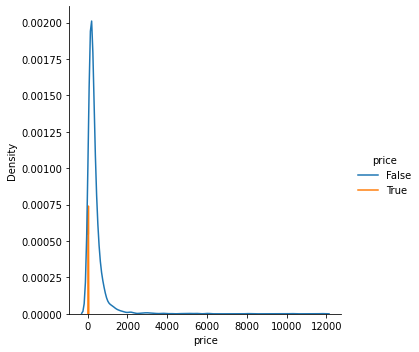

In [6]:
p=belize_df['price']<357
p.value_counts()
p_50=belize_df['price']<50
p_50.value_counts()
sns.displot(belize_df, x='price', hue=p_50, kind='kde')

In [7]:
#ways of finding frequecy of each price
belize_df.groupby('price').size().div(len(belize_df))
belize_df['price'].value_counts()/belize_df['price'].count()
#limiting set to properties under $50 
df=belize_df['price']<50
#This calculates the frequncy distribution of properties under $50 not probability 
df.value_counts()/df.count() #= 0.017525

belize_df['price'].mean()  #357.1022889842632
belize_df['price'].std() #563.1248245871559
# norm.cdf, Cumulative Density Function finds the probability that the variable has a value less than or equal to
scipy.stats.norm.cdf(50,357.1022889842632,563.1248245871559) 
# another way to do the above operation through combined steps
#stats.norm.cdf(50,belize_df['price'].mean(), belize_df['price'].std())
#another built in method for less than probability using mean and std
from statistics import NormalDist

NormalDist(mu=357, sigma=563).cdf(50) #can accept ppf and pdf

0.2927759838151834

## 5.	Calculate the sample variance and standard deviation for all the numerical columns in the same output. 
a.	Why sample variance and not population variance?
b.	What is your takeaway for each metric?
c.	What are the scales of measurement for each of these values? 


a)We are only looking at a portion / sample of the data set (numerical data only) population data would include all of the available data. 

b) The data is spread out or has a higher variance than deviation from the mean with the exception of lat and lon.  

c) price, nights, availability, host listings = ratio
host id, id, reviews = ordinal
lat, lon = interval

In [8]:
#use agg pass to pass multiple functions
belize_df.agg([np.var, np.std])

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
var,1.661428e+14,1.036327e+16,0.288841,0.147361,317109.568066,32.147122,919.773508,0.438448,2674.046405,14548.613157
std,1.288964e+07,1.018001e+08,0.537440,0.383876,563.124825,5.669843,30.327768,0.662154,51.711183,120.617632


In [16]:
# another way to code the same functions
#set ddof=1 to adjust to stat var and std
#'numeric_only'==None removes non numeric columns
np.var(belize_df, 'numeric_only'==None, ddof=1), np.std(belize_df, 'numeric_only'==None, ddof=1)

(id                                1.661428e+14
 host_id                           1.036327e+16
 latitude                          2.888413e-01
 longitude                         1.473608e-01
 price                             3.171096e+05
 minimum_nights                    3.214712e+01
 number_of_reviews                 9.197735e+02
 reviews_per_month                 4.384482e-01
 calculated_host_listings_count    2.674046e+03
 availability_365                  1.454861e+04
 dtype: float64,
 id                                1.288964e+07
 host_id                           1.018001e+08
 latitude                          5.374396e-01
 longitude                         3.838760e-01
 price                             5.631248e+02
 minimum_nights                    5.669843e+00
 number_of_reviews                 3.032777e+01
 reviews_per_month                 6.621542e-01
 calculated_host_listings_count    5.171118e+01
 availability_365                  1.206176e+02
 dtype: float64)

## 6.	What percent of Airbnb listings in Belize are available 360 days a year or more?
a.	360 days or less?
b.	What distribution does this data most closely fit?


6)39.52% are greater than or equal to 360

a)61.55% are less than  or equal to 360

b) This distribution is left skewed the mean is to the left of the median, they are not equal (non-normal)

In [10]:
#limit to >=360 
d=belize_df['availability_365']>=360
#count units available to >=360 
c=d.value_counts()
#percent at 360 or above
(c/ belize_df['availability_365'].count()) * 100

False    60.479256
True     39.520744
Name: availability_365, dtype: float64

In [11]:
#limit to >=360 
h=belize_df['availability_365']<=360
#count units available to <=360 
e=h.value_counts()
#percent at 360 or below
(e/ belize_df['availability_365'].count()) * 100

True     61.552217
False    38.447783
Name: availability_365, dtype: float64

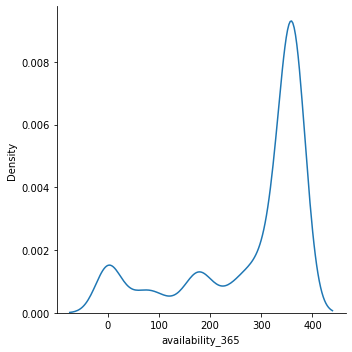

In [12]:
d=belize_df['availability_365']>=360
d.value_counts()
belize_df['availability_365'].describe()
sns.displot(belize_df, x='availability_365', kind='kde')

## 7.	What minimum night count are 75% of Airnbnb listing in Belize greater than?

75% of listing are greater than or equal to 1 night. 

In [13]:
#view the min # of nights booked
belize_df['minimum_nights'].value_counts()
#cal the percentile (100-p%) are greter than or equal to 
belize_df['minimum_nights'].quantile(0.75) #25% are greater than this
belize_df['minimum_nights'].quantile(0.25) #75% are greater than this 

1.0

In [14]:
belize_df['minimum_nights'].describe()

count    2796.000000
mean        2.263948
std         5.669843
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       180.000000
Name: minimum_nights, dtype: float64

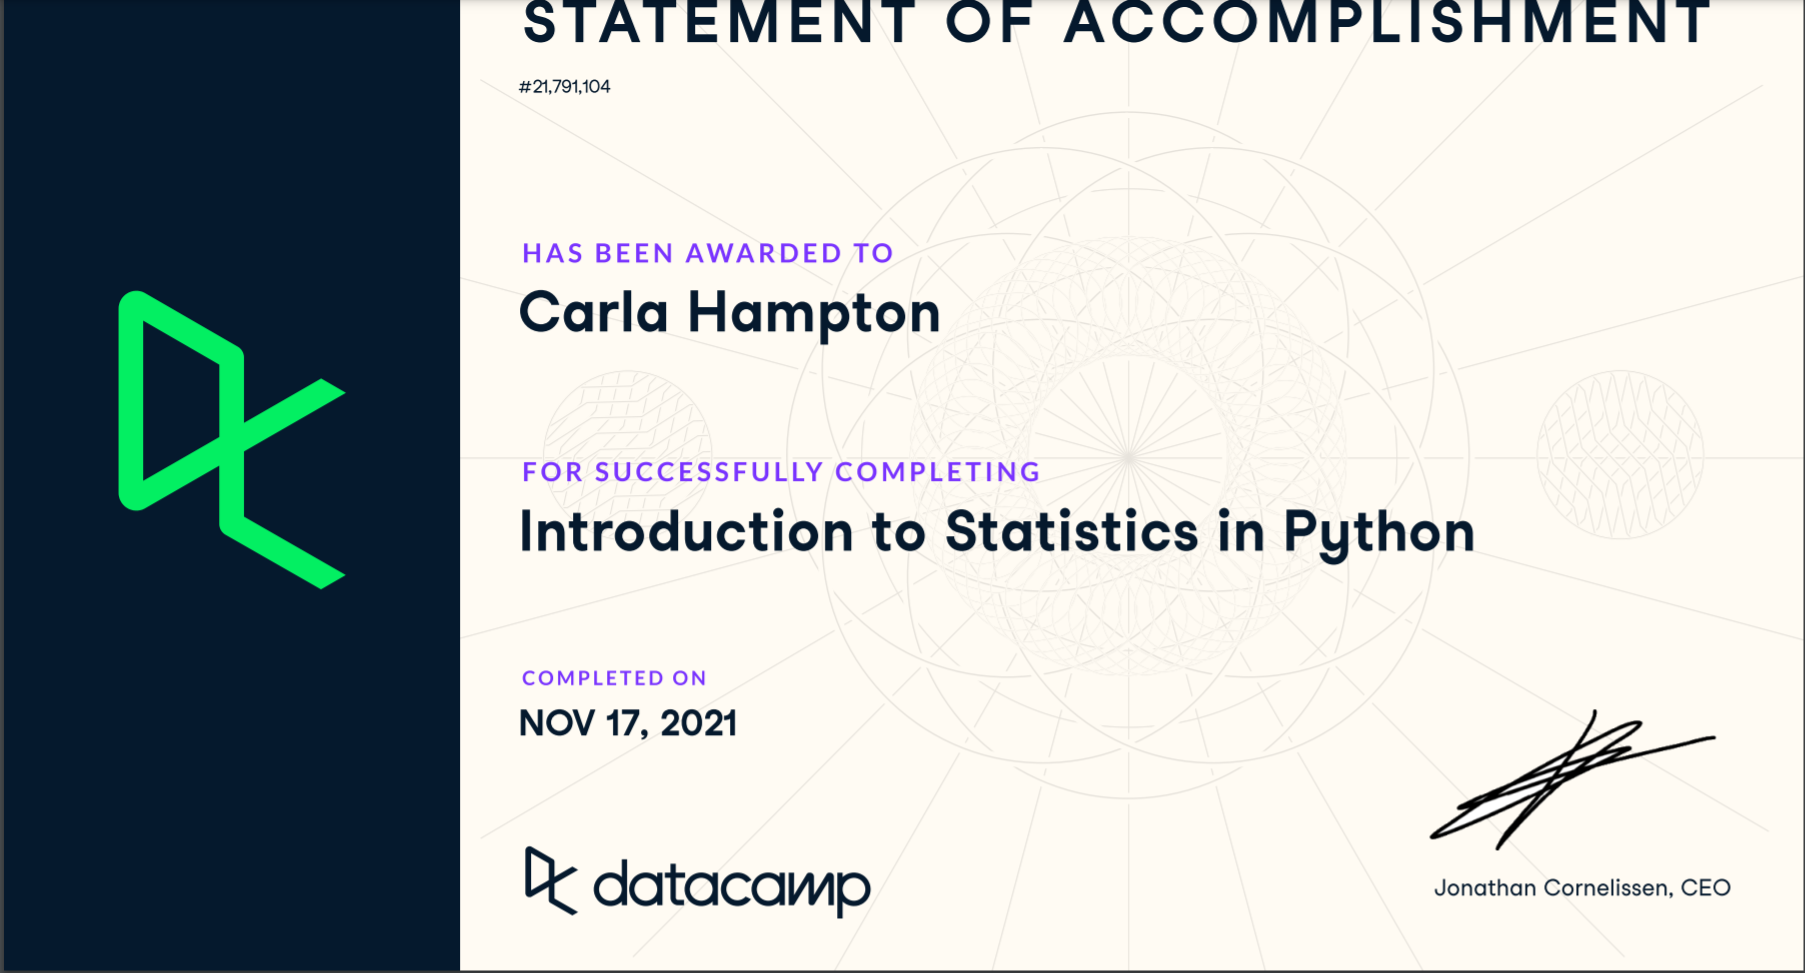